In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,Dropout,Dense,Embedding

In [4]:
#load the dataset
data = pd.read_csv ('/content/drive/MyDrive/Datasets/imdb_dataset.csv')

In [5]:
data.head(3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


In [9]:
data['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [11]:
# Dataset is balanced
data.sentiment.value_counts()

0    50000
Name: sentiment, dtype: int64

In [10]:
# map 'positive' to 1 and 'negative' to 0
data.sentiment = df.sentiment.apply (
    lambda x: 1 if x == 'positive' else 0
)

In [16]:
data.shape

(50000, 2)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


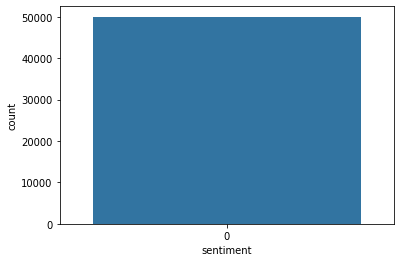

In [12]:
sns.countplot(x='sentiment',data=data)

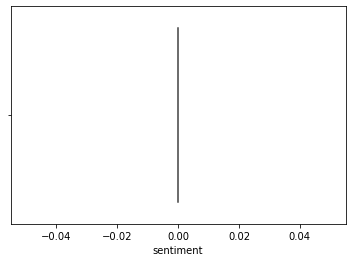

In [13]:
sns.violinplot(x='sentiment',data=data)

## DATA PRE-PROCESSING

In [14]:
columns = []
for i in data.columns:
  columns.append(i)
print(columns)

['review', 'sentiment']


In [15]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [26]:
# Biggest review
big = data['review'][0]
for i in data['review']:
  if len(i) > len(big):
    big = i
print(big)
print(len(big))

Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, but

In [20]:
# Smallest review
small = data['review'][0]
for i in data['review']:
  if len(i) < len(small):
    small = i
print(small)

Read the book, forget the movie!


In [29]:
# Get the index of the smallest review
for i in range(len(data['review'])):
  if data["review"][i] == small:
    print("The smallest review is at index ",i)
    small_id = i

The smallest review is at index  27521


## TEXT PRE-PROCESSING

In [22]:
x = data["review"]
y = data["sentiment"]
print (y)

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64


In [23]:
tokenizer = Tokenizer(10000,lower=True)
tokenizer.fit_on_texts(x)
print(x[0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [25]:
sequence = tokenizer.texts_to_sequences(x)
print (sequence[0])

[27, 4, 1, 79, 2102, 45, 1072, 12, 100, 147, 39, 307, 3184, 398, 474, 26, 3195, 33, 23, 203, 14, 11, 6, 621, 48, 596, 16, 68, 7, 7, 1, 86, 148, 12, 3241, 68, 42, 3184, 13, 92, 5398, 2, 134, 4, 570, 60, 268, 8, 203, 36, 1, 661, 139, 1740, 68, 11, 6, 21, 3, 119, 15, 1, 7888, 2333, 38, 11, 119, 2595, 54, 5911, 16, 5510, 5, 1479, 376, 38, 570, 92, 6, 3804, 8, 1, 360, 356, 4, 1, 661, 7, 7, 9, 6, 433, 3184, 14, 12, 6, 1, 358, 5, 1, 6813, 2538, 1064, 9, 2711, 1421, 20, 538, 32, 4636, 2468, 4, 1, 1208, 117, 29, 1, 7017, 25, 2970, 2, 391, 34, 6, 21, 299, 20, 1, 4910, 7364, 538, 6, 344, 5, 106, 8161, 5050, 7889, 2453, 2, 51, 34, 327, 9106, 7365, 2, 8697, 23, 110, 225, 243, 7, 7, 10, 58, 131, 1, 280, 1324, 4, 1, 119, 6, 693, 5, 1, 192, 12, 9, 269, 117, 79, 276, 589, 3024, 834, 180, 1320, 4161, 15, 2523, 1243, 834, 1443, 834, 887, 3184, 149, 954, 183, 1, 86, 398, 10, 123, 210, 3241, 68, 14, 34, 1637, 9, 13, 2239, 10, 413, 131, 10, 13, 1592, 15, 9, 18, 14, 10, 287, 51, 10, 1417, 3, 1280, 15, 3184, 

In [27]:
encoded_sequence = pad_sequences(sequence,maxlen=200,padding='pre')
encoded_sequence[0]

array([  12,    6,    1,  358,    5,    1, 6813, 2538, 1064,    9, 2711,
       1421,   20,  538,   32, 4636, 2468,    4,    1, 1208,  117,   29,
          1, 7017,   25, 2970,    2,  391,   34,    6,   21,  299,   20,
          1, 4910, 7364,  538,    6,  344,    5,  106, 8161, 5050, 7889,
       2453,    2,   51,   34,  327, 9106, 7365,    2, 8697,   23,  110,
        225,  243,    7,    7,   10,   58,  131,    1,  280, 1324,    4,
          1,  119,    6,  693,    5,    1,  192,   12,    9,  269,  117,
         79,  276,  589, 3024,  834,  180, 1320, 4161,   15, 2523, 1243,
        834, 1443,  834,  887, 3184,  149,  954,  183,    1,   86,  398,
         10,  123,  210, 3241,   68,   14,   34, 1637,    9,   13, 2239,
         10,  413,  131,   10,   13, 1592,   15,    9,   18,   14,   10,
        287,   51,   10, 1417,    3, 1280,   15, 3184,    2,  189,    5,
          1,  299, 2046,    4, 2150,  570,   21,   39,  570,   18, 7658,
       7154, 5010,   26, 2983,   41,   15,    3, 69

In [30]:
print(encoded_sequence[small_id])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 339   1 275 834
   1  17]


In [32]:
final_x = encoded_sequence
final_y = np.array(y)

## TEST TRAIN SPLIT

In [33]:
x_train, x_test, y_train, y_test = train_test_split(final_x,final_y, test_size=0.33, random_state=42)

In [34]:
print(x_train.shape,y_train.shape)

(33500, 200) (33500,)


## MODEL BUILDING

In [35]:
model = Sequential()
model.add(
    Embedding(
        input_dim=10000,
        output_dim=120,
        input_length=200,
    ),)

In [36]:
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 120)          1200000   
_________________________________________________________________
bidirectional (Bidirectional (None, 200, 128)          94720     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 1,336,001
Trainable params: 1,336,001
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
prediction = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=2,batch_size=32)

Epoch 1/2
1047/1047 [==============================] - 492s 463ms/step - loss: 2.5542e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/2
1047/1047 [==============================] - 483s 461ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


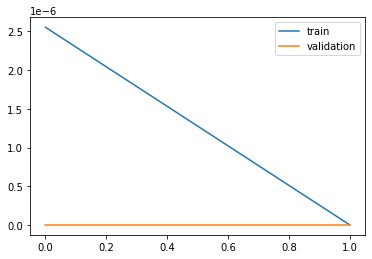

In [39]:
# Plot loss 
plt.plot(prediction.history['loss'],label='train')
plt.plot(prediction.history['val_loss'],label='validation')
plt.legend(loc='best')
plt.show()

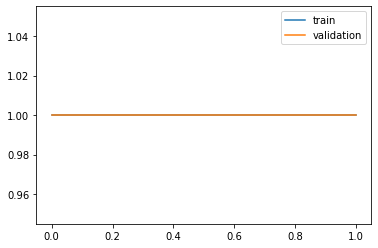

In [40]:
# Plot accuracy
plt.plot(prediction.history['accuracy'],label='train')
plt.plot(prediction.history['val_accuracy'],label='validation')
plt.legend(loc='best')
plt.show()